In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt
from uncertainties import *

savedir = "E01/"

In [4]:
all_data = loader.load_data( "../CloudVenetoAnalysisBis/**/" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

48

In [21]:
def compute_in_decades( thearray, func ):
    tot_len = len( thearray )
    cluster_len = int( tot_len / 10 )
    results = []
    for i in range( 10 ):
        results.append( func( thearray[ cluster_len * i : cluster_len * ( i + 1 ) ] ) )
    u = ufloat( func( thearray ), np.std( results ) )
    print( u )
    return u

In [22]:
for d in data:
    d['pj_over_1_minus_q_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side'] / ( 1 - d['defects_frac'] )
    d['pj_u'] = compute_in_decades( d['chunks'], lambda d: np.mean( d ) ) / d['side'] / d['side']

210584.8+/-1.8
210584.8+/-1.8
191950.4+/-2.6
191950.4+/-2.6
164504.5+/-2.6
164504.5+/-2.6
143857+/-16
143857+/-16
210454.4+/-1.8
210454.4+/-1.8
191402.5+/-1.6
191402.5+/-1.6
198898.6+/-1.1
198898.6+/-1.1
180778+/-4
180778+/-4
198478.4+/-1.7
198478.4+/-1.7
178776.8+/-1.9
178776.8+/-1.9
187069.4+/-2.1
187069.4+/-2.1
166586+/-8
166586+/-8
199065.9+/-1.1
199065.9+/-1.1
174672.5+/-2.0
174672.5+/-2.0
154229+/-5
154229+/-5
163628.1+/-1.3
163628.1+/-1.3
140044+/-12
140044+/-12
210378.9+/-1.1
210378.9+/-1.1
191038.8+/-1.8
191038.8+/-1.8
198815.5+/-1.7
198815.5+/-1.7
180101.8+/-2.8
180101.8+/-2.8
198314.1+/-1.7
198314.1+/-1.7
178063.2+/-1.3
178063.2+/-1.3
181875+/-5
181875+/-5
186867.5+/-1.9
186867.5+/-1.9
165218.7+/-3.3
165218.7+/-3.3
174280.9+/-1.0
174280.9+/-1.0
152830+/-4
152830+/-4
163112.7+/-1.6
163112.7+/-1.6
137352+/-14
137352+/-14
210329.5+/-0.9
210329.5+/-0.9
190780.5+/-2.4
190780.5+/-2.4
198768.1+/-2.2
198768.1+/-2.2
179672.9+/-2.4
179672.9+/-2.4
198759.3+/-1.3
198759.3+/-1.3
198201.1

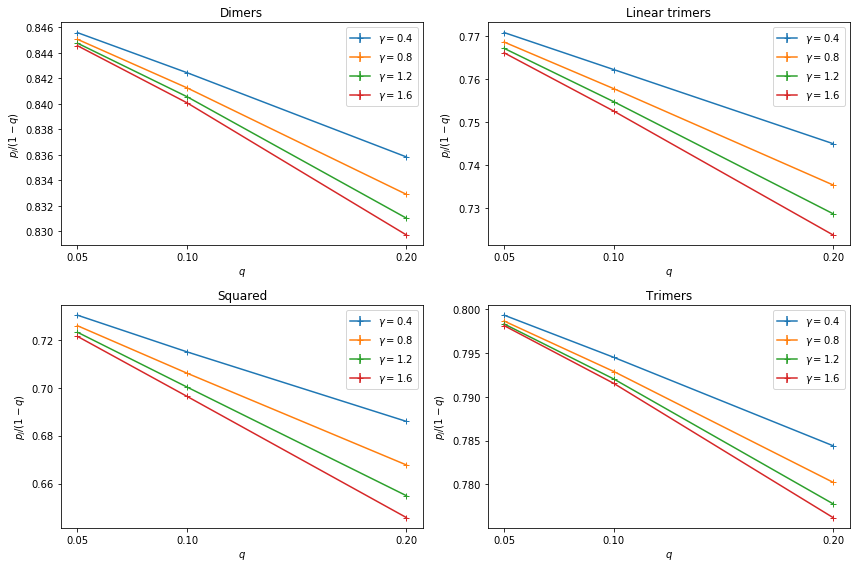

In [24]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_normalized_witherrors.pdf" )
plt.savefig( savedir + "jamming_normalized_witherrors.png" )

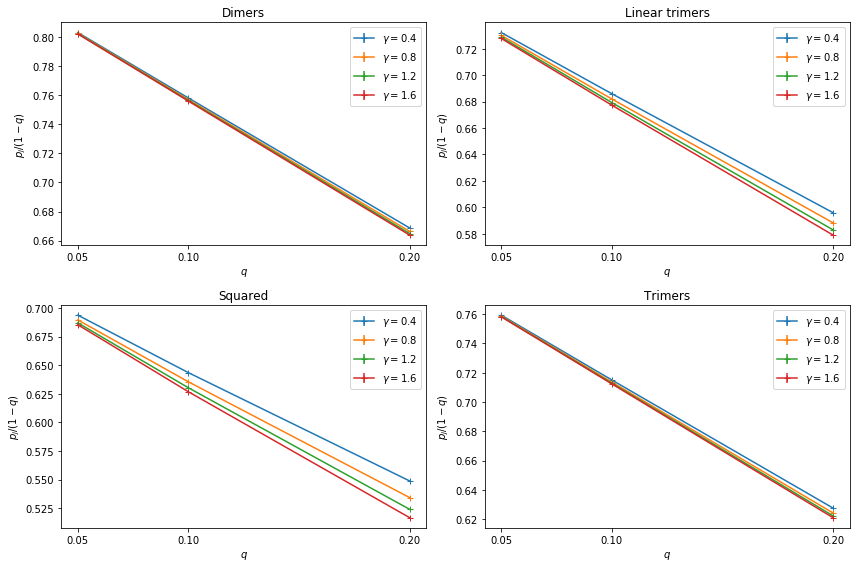

In [25]:
filtered_data = data

splt.oneitem_iterate_errorbar(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_u'],
    ],
    lambda it, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda it: (
        plt.title( fr"{it}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming_witherrors.pdf" )
plt.savefig( savedir + "jamming_witherrors.png" )